In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install tensorflow --upgrade


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras


   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 1.3/390.2 MB 6.7 MB/s eta 0:00:59
   ---------------------------------------- 2.6/390.2 MB 6.3 MB/s eta 0:01:02
   ---------------------------------------- 3.7/390.2 MB 5.9 MB/s eta 0:01:06
    --------------------------------------- 5.0/390.2 MB 5.9 MB/s eta 0:01:06
    --------------------------------------- 6.0/390.2 MB 5.6 MB/s eta 0:01:09
    --------------------------------------- 7.1/390.2 MB 5.6 MB/s eta 0:01:09
    --------------------------------------- 8.4/390.2 MB 5.7 MB/s eta 0:01:08
   - -------------------------------------- 10.0/390.2 MB 5.7 MB/s eta 0:01:07
   - -------------------------------------- 11.0/390.2 MB 5.7 MB/s eta 0:01:07
   - -------------------------------------- 12.1/390.2 MB 5.7 MB/s eta 0:01:07
   - -------------------------------------- 13.1/390.2 MB 5.6 MB/s eta 0:01:07
   - -------------------------------------- 14.2/390.2 MB 5.6 MB/s 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [11]:
X_test=X_test/255
X_train=X_train/255

In [6]:
len(X_train)


60000

In [14]:
len(X_test)

10000

In [15]:
len(X_train[0])

28

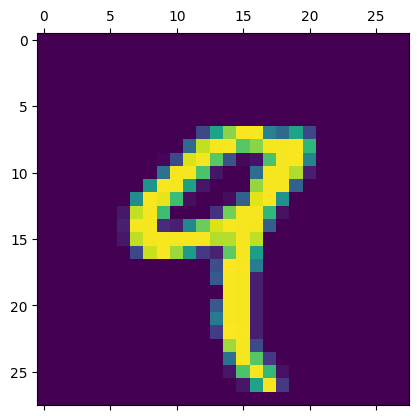

In [19]:
plt.matshow(X_train[4])

In [20]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
y_train[4]

9

In [7]:
X_train.shape

(60000, 28, 28)

In [12]:
x_train_flattned=X_train.reshape(len(X_train),28*28)
x_train_flattned.shape

(60000, 784)

In [13]:
x_test_flattned=X_test.reshape(len(X_test),28*28)
x_test_flattned.shape

(10000, 784)

In [14]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattned,y_train,epochs=5)

c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8146 - loss: 0.7199
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9151 - loss: 0.3077
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9208 - loss: 0.2852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9241 - loss: 0.2742
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9247 - loss: 0.2681


In [15]:
model.evaluate(x_test_flattned,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9146 - loss: 0.2998


[0.26473692059516907, 0.9262999892234802]

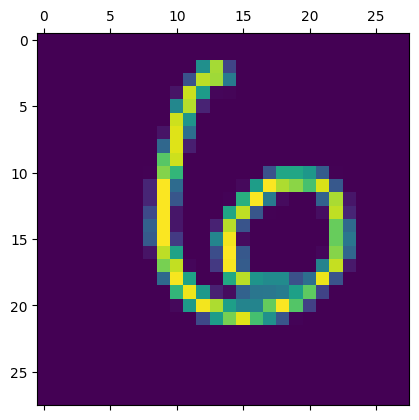

In [24]:
plt.matshow(X_test[100])

In [20]:
y_predicted=model.predict(x_test_flattned)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.0874939e+00, 3.9251136e-05, 8.7522459e+00, 9.5686028e+01,
       2.4332657e-01, 1.0244023e+01, 9.3894807e-05, 9.9974533e+01,
       8.5060616e+00, 6.4491798e+01], dtype=float32)

In [25]:
np.argmax(y_predicted[100])

6

In [26]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [27]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   6,    9,  931,   14,    8,    3,   13,   10,   35,    3],
       [   2,    0,   23,  916,    0,   26,    2,   11,   23,    7],
       [   2,    2,    6,    1,  917,    0,    8,    4,    9,   33],
       [  10,    3,    3,   25,   11,  783,   14,    6,   29,    8],
       [  14,    3,    7,    1,    7,   13,  909,    2,    2,    0],
       [   2,    7,   24,    5,    7,    0,    0,  950,    1,   32],
       [   9,    9,    7,   19,    9,   26,    9,   11,  869,    6],
       [  11,    7,    1,   11,   29,    7,    0,   28,    7,  908]])>

Text(95.72222222222221, 0.5, 'Actual')

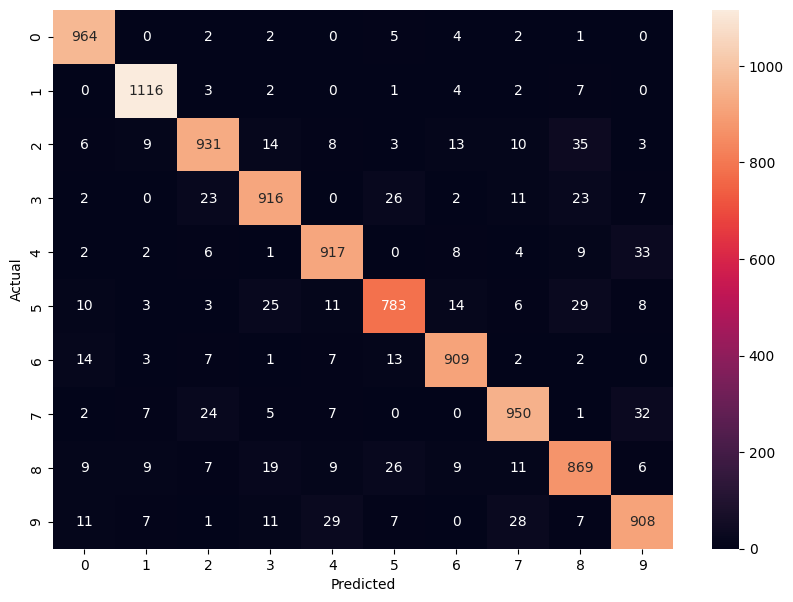

In [28]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [30]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='relu' )
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattned,y_train,epochs=5)

c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1049 - loss: 2.8723
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0994 - loss: 2.2519
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0994 - loss: 2.2728
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0976 - loss: 2.2761
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.2660
